In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

from pycbc.waveform import get_fd_waveform, print_fd_approximants
import lalsimulation as lalsim, lal, numpy as np

In [17]:
par = {'mass1':30,
      'mass2':30,
      'spin1z':0,
      'delta_f':1/16,
      'distance':100,
      'f_lower':20}

lambda_g = 1e15

hp, hc = get_fd_waveform(approximant='IMRPhenomD',
                                 **par)
hp_mg, _ = get_fd_waveform(approximant='massivegraviton',
                           baseapprox = 'IMRPhenomD',
                           lambda_g = lambda_g,
                           **par)

Text(0, 0.5, 'Real h+(f)')

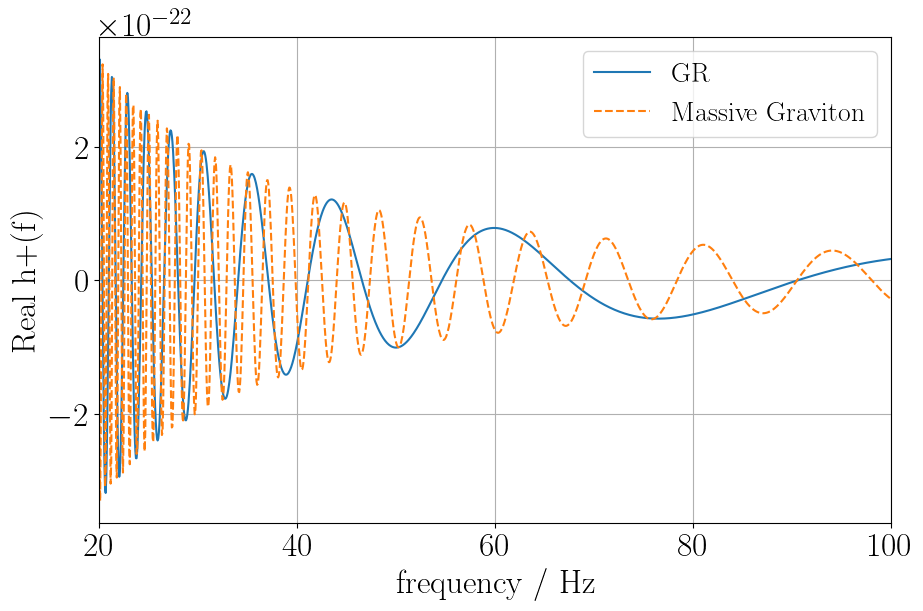

In [18]:
plt.plot(hp.sample_frequencies,hp,label='GR')
plt.plot(hp_mg.sample_frequencies,hp_mg,ls='--',label='Massive Graviton')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(20,100)
plt.legend()
plt.xlabel('frequency / Hz')
plt.ylabel('Real h+(f)')

In [19]:
from pycbc import cosmology, pnutils
import scipy.constants
import numpy

In [20]:
z = cosmology.redshift(par['distance'])
D = pnutils.megaparsecs_to_meters(float(par['distance']))
c = scipy.constants.speed_of_light

phi = - numpy.pi * D * c / lambda_g / lambda_g / (1+z) / hp.sample_frequencies[1:]

In [21]:
hp_mg.data

array([ 0.+0.j, -0.+0.j,  0.+0.j, ...,  0.-0.j,  0.-0.j,  0.-0.j])

In [22]:
hp.data

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

Text(0.5, 0, 'frequency / Hz')

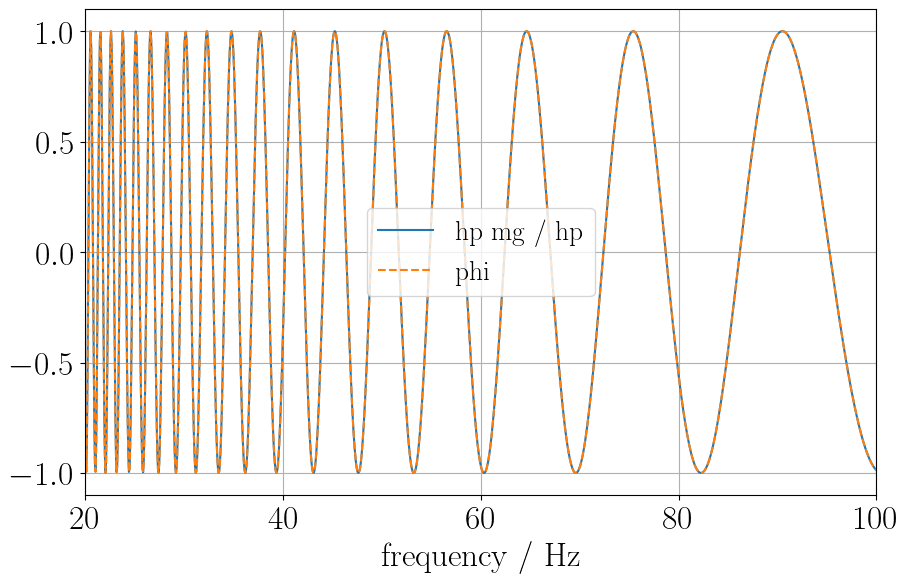

In [23]:
plt.plot(hp_mg.sample_frequencies,hp_mg/hp,label='hp mg / hp')
kmin = int(20/hp_mg.delta_f)
plt.plot(hp_mg.sample_frequencies[kmin:],numpy.exp(1j*phi[kmin-1:]),ls='--',label='phi')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(20,100)
plt.legend()
plt.xlabel('frequency / Hz')
#plt.ylabel('Real h+(f)')

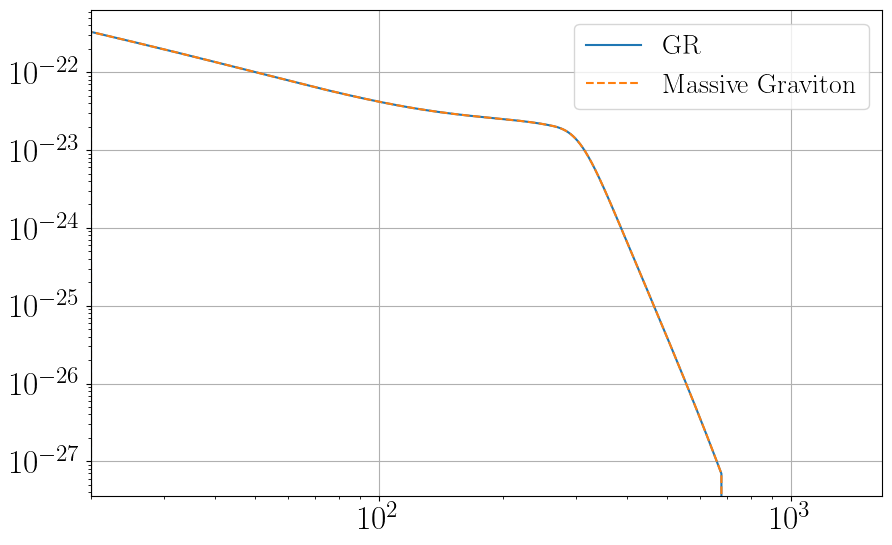

In [24]:
plt.plot(hp.sample_frequencies,abs(hp),label='GR')
plt.plot(hp_mg.sample_frequencies,abs(hp_mg),ls='--',label='Massive Graviton')
plt.xscale('log')
plt.yscale('log')
plt.xlim(20,)
plt.legend()

# lalsimulation

In [25]:
longAscNodes = 0
eccentricity = 0 
meanPerAno = 0
approx=lalsim.IMRPhenomD

nonGRdict = lal.CreateDict()

m1 = par['mass1']
m2 = par['mass2']
s1 = [0,0,0]#[0.4,-0.2,0.43]
s2 = [0,0,0]#[-0.1,0.8,0]
dist = par['distance']
iota = 0
phi_c = 0.

deltaF = par['delta_f']
f_high = 4096 ## f_LSO rounded to powers of two
Fs = 2*f_high
f_ref = par['f_lower']
f_low = par['f_lower']

hplus, hcross = lalsim.SimInspiralChooseFDWaveform(m1 * lal.MSUN_SI, m2 * lal.MSUN_SI,\
                                                          s1[0], s1[1], s1[2],\
                                                          s2[0], s2[1], s2[2],\
                                                          dist * 1e6 * lal.PC_SI, iota, phi_c,\
                                                          longAscNodes, eccentricity, meanPerAno,
                                                          deltaF, f_low, f_high, f_ref,\
                                                          nonGRdict, approx)
hplal = hplus.data.data
#hc = hcross.data.data
freqs = np.arange(0,f_high+deltaF,deltaF)

Text(0, 0.5, 'Real h+(f)')

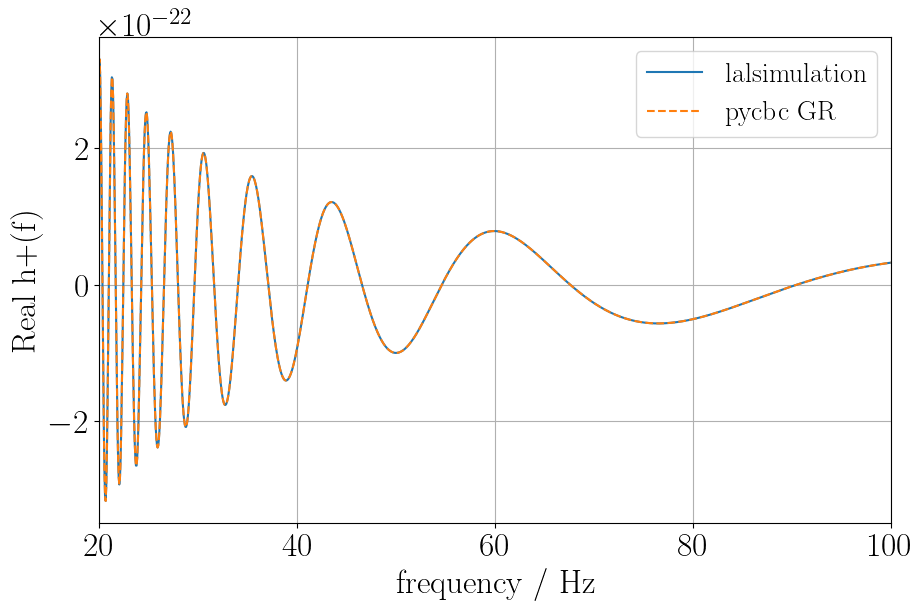

In [26]:
plt.plot(freqs,hplal,label='lalsimulation')
plt.plot(hp.sample_frequencies,hp,ls='--',label='pycbc GR')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(20,100)
plt.legend()
plt.xlabel('frequency / Hz')
plt.ylabel('Real h+(f)')

In [27]:
lalsim.SimInspiralWaveformParamsInsertNonGRMassiveGravitonLambda(nonGRdict,lambda_g)

0

In [28]:
hplus_mg, _ = lalsim.SimInspiralChooseFDWaveform(m1 * lal.MSUN_SI, m2 * lal.MSUN_SI,\
                                                          s1[0], s1[1], s1[2],\
                                                          s2[0], s2[1], s2[2],\
                                                          dist * 1e6 * lal.PC_SI, iota, phi_c,\
                                                          longAscNodes, eccentricity, meanPerAno,
                                                          deltaF, f_low, f_high, f_ref,\
                                                          nonGRdict, approx)

Text(0, 0.5, 'Real h+(f)')

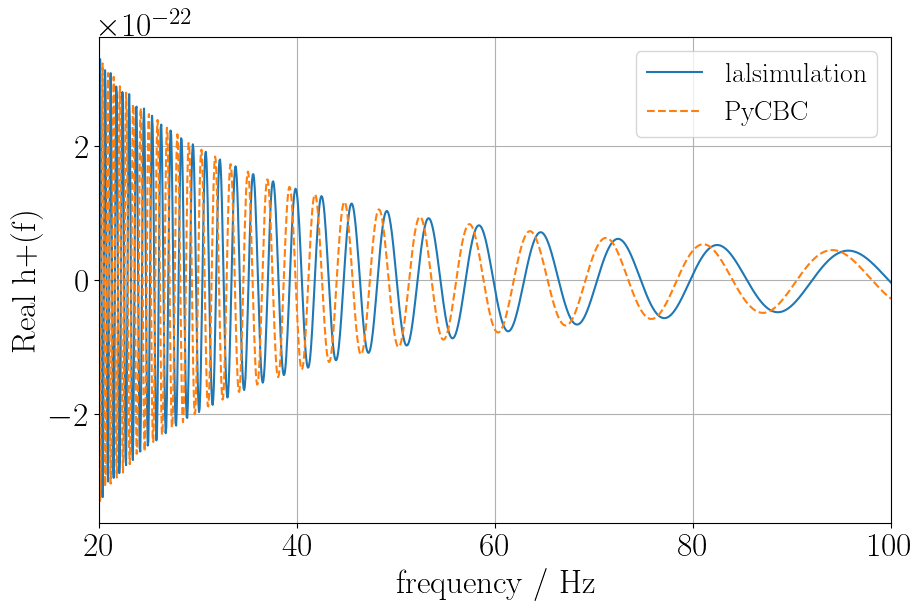

In [29]:
plt.plot(freqs,hplus_mg.data.data,label='lalsimulation')
plt.plot(hp_mg.sample_frequencies,hp_mg,ls='--',label='PyCBC')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(20,100)
plt.legend()
plt.xlabel('frequency / Hz')
plt.ylabel('Real h+(f)')

In [30]:
phi_corrlal = - numpy.pi * D * c / lambda_g / lambda_g /  freqs
h_lal_mg2gr = hplus_mg.data.data / np.exp(1j*phi_corrlal)

/work/yifan.wang/infotgr/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/work/yifan.wang/infotgr/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/work/yifan.wang/infotgr/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in exp
  


/work/yifan.wang/infotgr/env/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Real h+(f)')

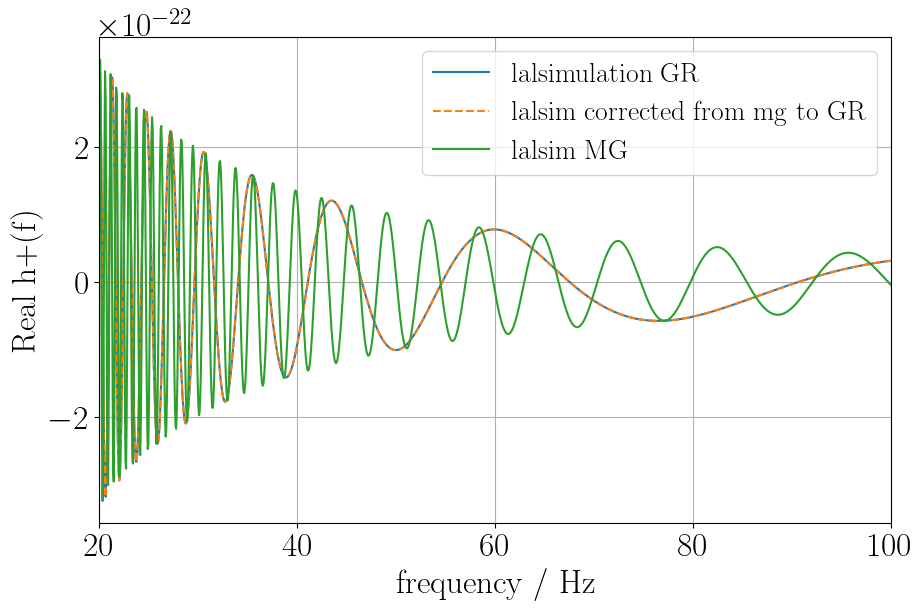

In [32]:
plt.plot(freqs,hplal,label='lalsimulation GR')
plt.plot(freqs,h_lal_mg2gr,ls='--',label='lalsim corrected from mg to GR')
plt.plot(freqs,hplus_mg.data.data,label='lalsim MG')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(20,100)
plt.legend()
plt.xlabel('frequency / Hz')
plt.ylabel('Real h+(f)')